<a href="https://colab.research.google.com/github/jamesdupark/image-grid/blob/main/image_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions:
Press the file icon 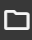 on the left-hand toolbar to open the session file viewer.

Press the upload button image.png in order to open the file viewer and choose the images you want to combine.

Images **must** have names ending in either a dash `-` or an underscore `_` followed by a number and `.tif`, i.e. `KA365_1.tif`.

Press the play button in the brackets `[ ]` in order to run a cell. Start by running cells 1 and 2.

In [3]:
#################### 1 ####################
import sys
from os import listdir, mkdir
from os.path import isfile, isdir, join
import re
import math
import tkinter as tk
from tkinter import filedialog
import argparse
from PIL import Image

In [4]:
#################### 2 ####################
def calculate_grid(imgs: list) -> list[int]:
    total = len(imgs)
    m = math.floor(math.sqrt(total)) # rows
    n = total // m + (1 if total % m else 0) # cols

    return [m, n]

def calculate_canvas(tile, grid_dims):
    cols, rows, padding = grid_dims
    canvas_width = tile.width * cols + (padding * cols) - padding
    canvas_height = tile.height * rows + (padding * rows) - padding
    return Image.new('RGB', (canvas_width, canvas_height), (255, 255, 255))

def combine_images(padding, images, basedir, grid_dims=None, rotation=180, standardized=True):
    if not grid_dims: # calculate dims if not provided
        rows, cols = calculate_grid(images)
    else:
        rows, cols = grid_dims
    if not standardized: # calculate max dims
        width_max = max([Image.open(basedir + image).width for image in images])
        height_max = max([Image.open(basedir + image).height for image in images])
    else:
        tile0 = Image.open(basedir + images[0])
        width_max = tile0.width
        height_max = tile0.height
    canvas = calculate_canvas(tile0, (cols, rows, padding))

    x = 0
    y = 0
    for i, image in enumerate(images):
        img = Image.open(basedir + image)
        img = img.rotate(rotation) # rotate image
        x_offset = 0
        y_offset = 0
        if not standardized:
            x_offset = int((width_max-img.width)/2)
            y_offset = int((height_max-img.height)/2)
        canvas.paste(img, (x+x_offset, y+y_offset))
        x += width_max + padding
        if (i+1) % cols == 0:
            y += height_max + padding
            x = 0
    canvas.save(basedir + 'out/image_grid.png')

def get_imgs(path):
    if isdir(path):
        imgdir = path
    else:
        raise RuntimeError(f'{path} is not a valid directory!')

    sort_key = lambda f: int(re.search("(?:_|-)([0-9]+).tif", f).group(1)) # key for sorting images into order - modify as necessary
    try:
        imgs = sorted([ f for f in listdir(imgdir) if isfile(join(imgdir, f)) ], key=sort_key)
        if not isdir(imgdir + "out"):
          mkdir(imgdir + "out")
    except AttributeError as e:
        if "no attribute \'group\'" in str(e):
            raise ValueError(
                ("Please ensure the target directory contains only tifs and that "
                 "filenames end in a number following an underscore or hyphen (i.e. KA331_1.tif)"))
        else: raise
    return imgs

# Setup
The following cells contain several parameters that we can adjust for our image grid:
* `PADDING` - the padding between images in the grid, in pixels
* `IMGDIR` - the directory (within the server's filesystem) that the images to be compiled are located in
  * Can switch to a folder in your Google Drive containing the images by running cells 4-5. **DO NOT** run cells 4-5 if you are not using Google Drive.
* `ROTATION` - rotation, in degrees to be applied to each image before placing in the grid
* `STANDARDIZED` - value representing whether or not the images are all the same size. Almost always will be `True`.
* `DIMS` - grid dimensions of the image grid to be created. If not set, will create a rectangular grid automatically. *Usually no need to set*.

In [5]:
#################### 3 ####################
PADDING = 50 # padding between images in pixels
IMGDIR = "./" # folder containing the images
ROTATION = 180 # rotate all images before placing
STANDARDIZED = True # True if all images are same size, False otherwise

In [7]:
#################### 4 ####################
ROWS = 0
COLUMNS = 0
DIMS = (ROWS, COLUMNS) # grid dimensions
if DIMS == (0, 0):
  DIMS = None

## Optional: Drive Setup
If you wish to use Google Drive, run cell 4. In the file view on the left, a new folder called `drive` should appear. Navigate to the folder containing your images and right-click on it (or press the three dots next to it). Select "copy path" and paste the path in cell 5 after `drive_path =`. Delete the `#`s in front of both lines and run cell 5.

In [1]:
#################### 4 ####################
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#################### 5 ####################
# drive_path =
# IMGDIR = drive_path + '/'

# Generating Image Grid
Run cells 6 and 7. Note that if image name format is wrong or image directory is wrong, an error will arise. The resulting image can be found in the `out` directory located in the folder the original images were in.

In [6]:
#################### 6 ####################
IMGS = get_imgs(IMGDIR) # get list of images from IMGDIR

In [9]:
#################### 7 ####################
combine_images(PADDING, IMGS, IMGDIR, DIMS, ROTATION, STANDARDIZED)